# Visualizations of Crime Data Counts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in final dataframe from AWS (Created in Sybilcast_SGD)

In [2]:
# Read in final dataframe from AWS (Created in Sybilcast_SGD)
url ="https://crime-bucket.s3.amazonaws.com/FINAL_DF.csv"
df = pd.read_csv(url)
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,Crm Cd,Crm Cd Desc,AREA NAME,Vict Age,Vict Sex,Vict Descent,Premis Desc,SEASON,day_night,NEWlat,NEWlon,NEW_Z
0,8000,VIOLATION OF ORDER,Newton,48,M,H,SINGLE FAMILY DWELLING,winter,day,1154.810306,13987.674630,-4019.093284
1,8000,VIOLATION OF ORDER,Hollywood,47,F,W,STREET,winter,night,1162.919123,14001.870570,-4035.225277
2,5000,VEHICLE-RELATED,Central,46,M,H,STREET,winter,night,1158.646713,13986.444654,-4025.586681
3,2000,ASSAULT/BATTERY,Central,51,M,B,OTHER PREMISE,winter,night,1158.959892,13981.336103,-4025.395357
4,2000,ASSAULT/BATTERY,Central,30,M,H,PARKING LOT,winter,night,1159.062025,13986.373696,-4026.297880


### Plot crime count by Area Name

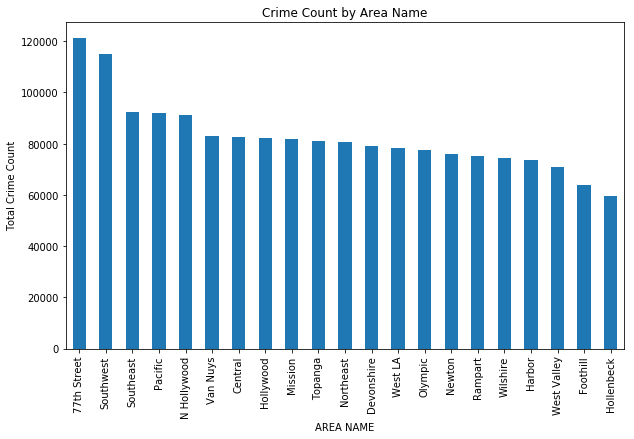

In [4]:
plt.figure(figsize=(10,6))
df.groupby('AREA NAME').count()['Crm Cd'].sort_values(ascending=False).plot(kind='bar')
plt.xticks(np.arange(0,21,1),labels=df.groupby('AREA NAME').count()['Crm Cd'].sort_values(ascending=False).index.values, rotation=90)
plt.ylabel('Total Crime Count')
plt.title('Crime Count by Area Name')
plt.savefig('Images/CrmCount_by_AreaName.jpg')

### Plot crime count by Victim Descent

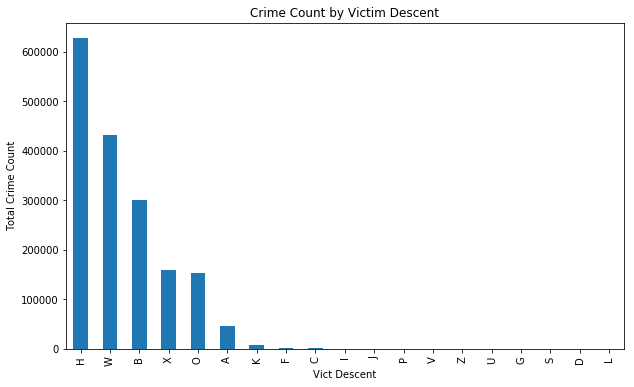

In [7]:
plt.figure(figsize=(10,6))
df.groupby('Vict Descent').count()['Crm Cd'].sort_values(ascending=False).plot(kind='bar')
vals = len(df.groupby('Vict Descent').count()['Crm Cd'].sort_values(ascending=False).index.values)
plt.xticks(np.arange(0,vals,1),labels=df.groupby('Vict Descent').count()['Crm Cd'].sort_values(ascending=False).index.values, rotation=90)
plt.ylabel('Total Crime Count')
plt.title('Crime Count by Victim Descent')
plt.savefig('Images/CrmCount_by_VictDescent.jpg')

### Plot crime count by Victim's Sex

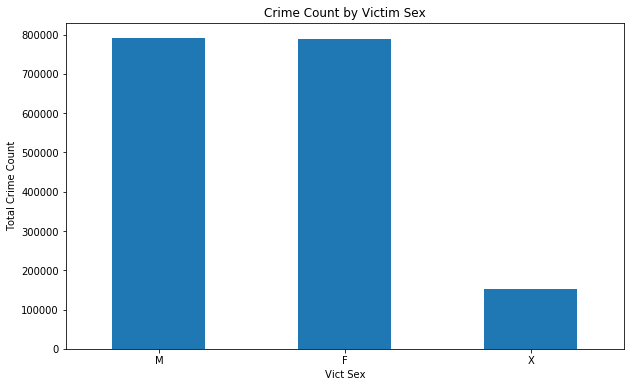

In [11]:
plt.figure(figsize=(10,6))
df.groupby('Vict Sex').count()['Crm Cd'].sort_values(ascending=False).plot(kind='bar')
vals = len(df.groupby('Vict Sex').count()['Crm Cd'].sort_values(ascending=False).index.values)
plt.xticks(np.arange(0,vals,1),labels=df.groupby('Vict Sex').count()['Crm Cd'].sort_values(ascending=False).index.values, rotation=0)
plt.ylabel('Total Crime Count')
plt.title('Crime Count by Victim Sex')
plt.savefig('Images/CrmCount_by_VictSex.jpg')

### Plot crime count by Victim Age

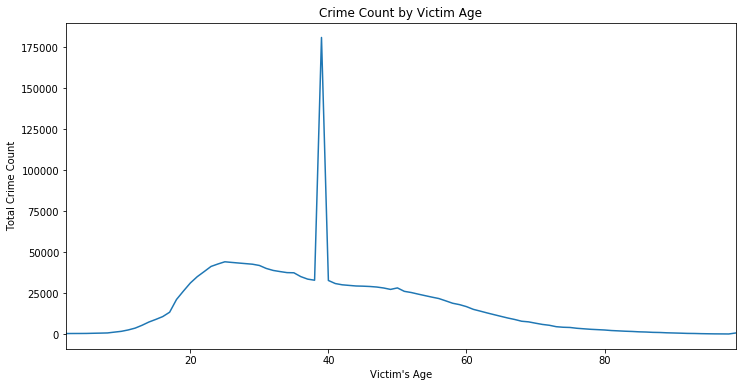

In [24]:
plt.figure(figsize=(12,6))
df.groupby('Vict Age').count()['Crm Cd'].plot()
plt.ylabel('Total Crime Count')
plt.xlabel("Victim's Age")
plt.title('Crime Count by Victim Age')
plt.savefig('Images/CrmCount_by_VictAge.jpg')

### Plot crime count by Season

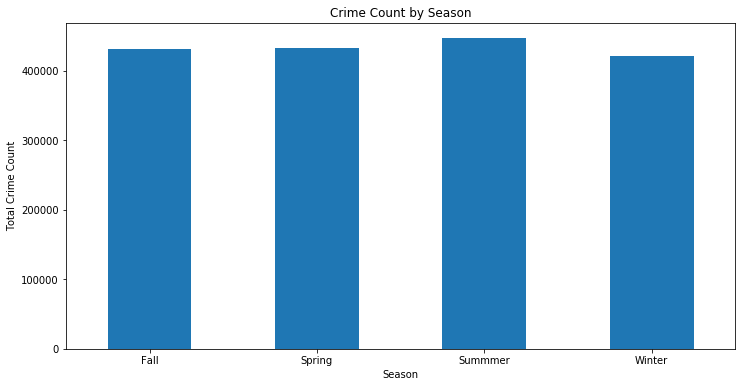

In [12]:
plt.figure(figsize=(12,6))
df.groupby('SEASON').count()['Crm Cd'].plot(kind='bar')
vals = len(df.groupby('SEASON').count()['Crm Cd'].sort_values(ascending=False).index.values)
plt.xticks(np.arange(0,vals,1),labels=['Fall','Spring','Summmer','Winter'], rotation=0)
plt.ylabel('Total Crime Count')
plt.xlabel("Season")
plt.title('Crime Count by Season')
plt.savefig('Images/CrmCount_by_Season.jpg')

### Plot crime count by Day and Night

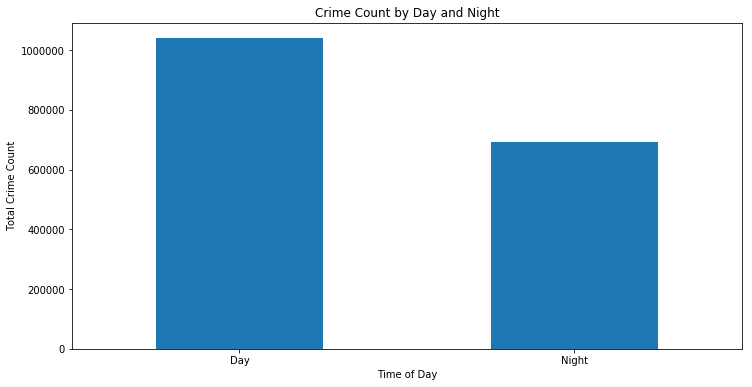

In [17]:
plt.figure(figsize=(12,6))
df.groupby('day_night').count()['Crm Cd'].plot(kind='bar')
vals = len(df.groupby('day_night').count()['Crm Cd'].sort_values(ascending=False).index.values)
plt.xticks(np.arange(0,vals,1),labels=['Day','Night'], rotation=0)
plt.ylabel('Total Crime Count')
plt.xlabel("Time of Day")
plt.title('Crime Count by Day and Night')
plt.savefig('Images/CrmCount_by_DayNight.jpg')

### Plot crime count by Premise Description

In [22]:
import seaborn as sns

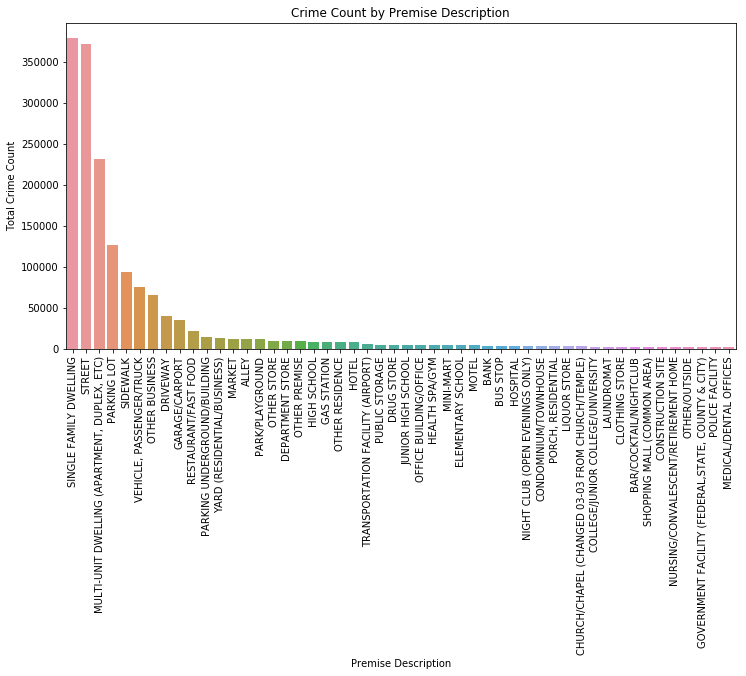

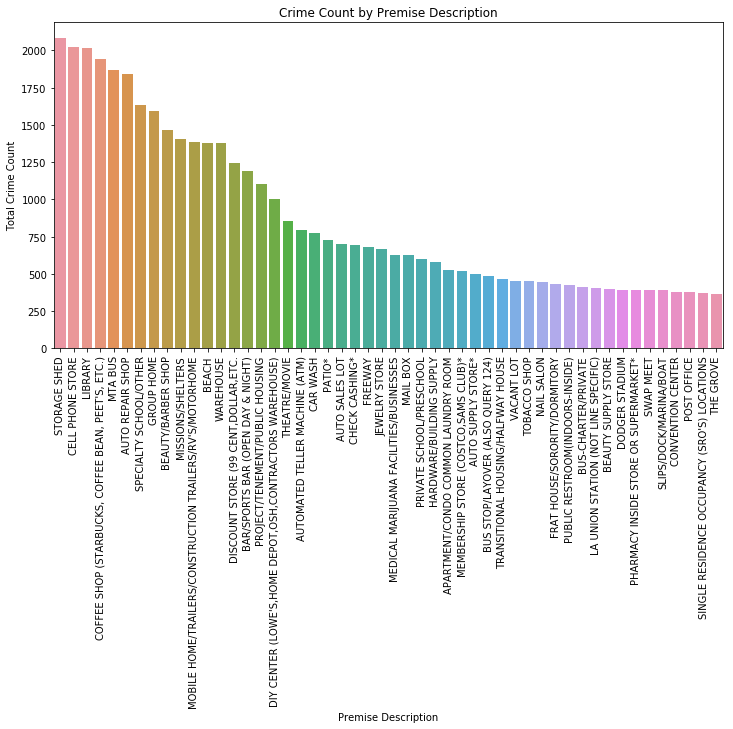

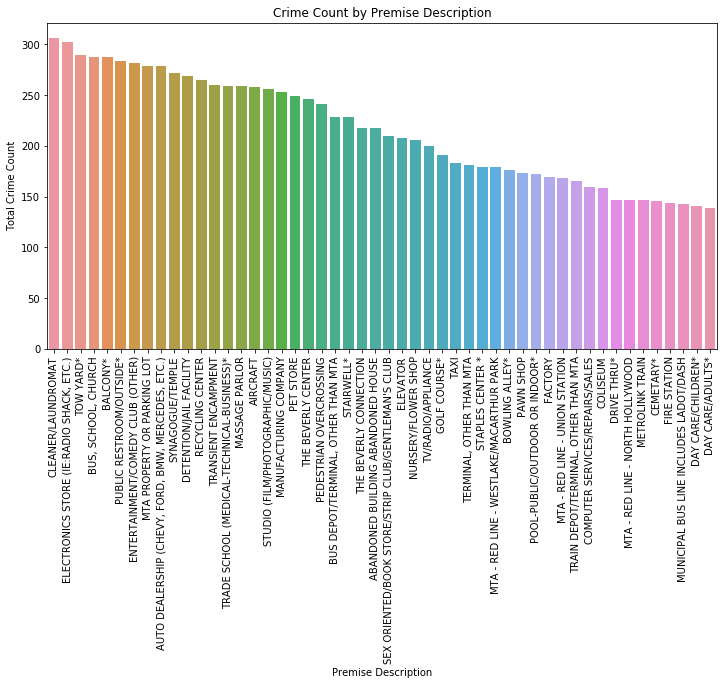

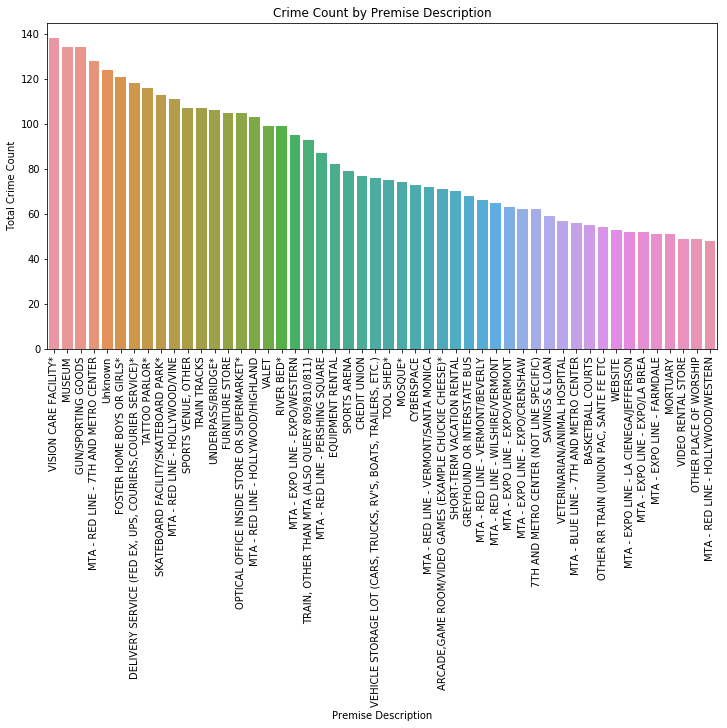

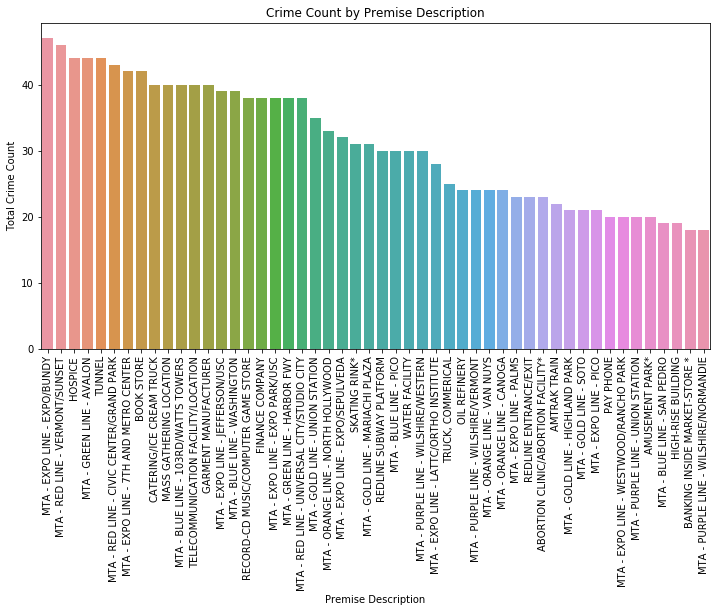

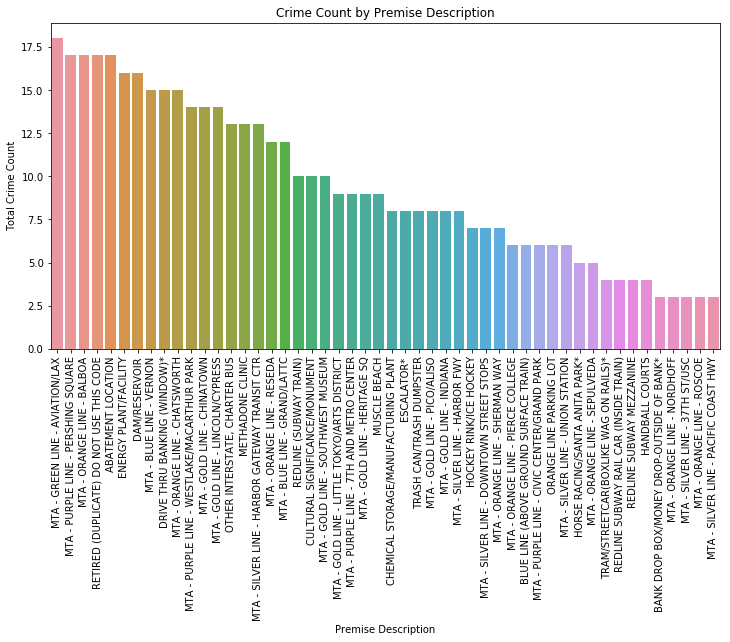

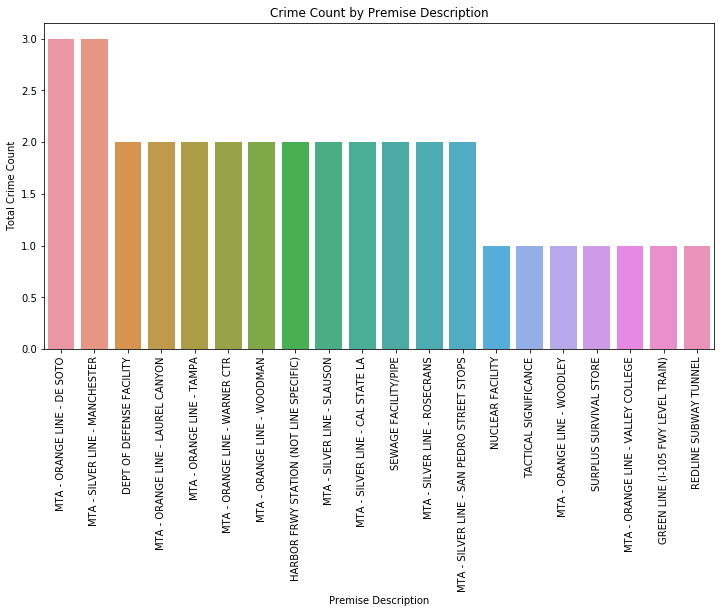

In [61]:
num_prem = len(df.groupby('Premis Desc').count()['Crm Cd'].sort_values(ascending=False))
k=1
for i in range (0,num_prem,50):
    x = df.groupby('Premis Desc').count()['Crm Cd'].sort_values(ascending=False)[i:i+50].index.values
    y = df.groupby('Premis Desc').count()['Crm Cd'].sort_values(ascending=False)[i:i+50].values
    plt.figure(figsize=(12,6))
    sns.barplot(x=x,y=y)
    plt.xticks(np.arange(0,len(x),1),labels=x, rotation=90)
    plt.ylabel('Total Crime Count')
    plt.xlabel("Premise Description")
    plt.title('Crime Count by Premise Description')
    fig_name = f'Images/CrmCount_by_PremisDesc_{k}.jpg'
    k+=1
    plt.savefig(fig_name)